In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt


data_ch = pd.read_excel('China.xlsx')
data_j = pd.read_excel('Japan.xlsx')
data_us = pd.read_excel('US.xlsx')
data_ir = pd.read_excel('Ireland.xlsx')
data_ca = pd.read_excel('Kanada.xlsx')
data_kz = pd.read_excel('all.xlsx')
data_ge = pd.read_excel('ger.xlsx')


# data['RGLP'] = (data['A'] - data['A'].shift(1)) / data['A'].shift(1) * 100
# data['GDPCT'] = data['GDPC']*450

data_ch['GERD_shifted'] = data_ch['GERD'].shift(2)
formula_stage_one = "GERD_shifted ~ GDPC.shift(3) + EMPIRE.shift(3)"
stage_one_model = sm.OLS.from_formula(formula_stage_one, data=data_ch).fit()
data_ch['GERD_predicted'] = stage_one_model.predict(data_ch)
print(data_ch)

formula_stage_two = "RGLP ~ GERD_predicted + np.power(GERD_predicted, 2)"
stage_two_model = sm.OLS.from_formula(formula_stage_two, data=data_ch).fit(cov_type='HC3')
betas_ch = stage_two_model.params

# betas[0] = -betas[0]
# betas[1] = -betas[1]
# betas[2] = -betas[2]
print(betas_ch)
intercept_ch = betas_ch[0]
gerd_predicted_ch = betas_ch[1]
gerd_predicted_sq_ch = betas_ch[2]

x = (-betas_ch[1])/(betas_ch[2]*2)
y = betas_ch[0]+betas_ch[1]*x+betas_ch[2]*(x**2)
print('x =', x)
print('y =', y)

    China     GERD  EMPIRE          GDPC   RGLP  GERD_shifted  GERD_predicted
0    1997  0.63873  75.039   2812.711135   7.86           NaN             NaN
1    1998  0.64689  74.800   3004.427341   6.55           NaN             NaN
2    1999  0.74963  74.559   3206.730026   6.47       0.63873             NaN
3    2000  0.89316  74.316   3451.679231   7.40       0.64689        0.759212
4    2001  0.94033  73.375   3712.338132   7.29       0.74963        0.793594
5    2002  1.05786  72.507   4024.355697   8.24       0.89316        0.828403
6    2003  1.12037  71.710   4400.825183   9.34       0.94033        0.864133
7    2004  1.21498  71.230   4817.211845   9.39       1.05786        0.991875
8    2005  1.30792  70.652   5334.646639  10.72       1.12037        1.110812
9    2006  1.36854  70.154   5979.781712  12.18       1.21498        1.221409
10   2007  1.37369  69.640   6795.174012  13.72       1.30792        1.290945
11   2008  1.44592  68.886   7581.453513   9.23       1.36854   

C:\Users\jummd\AppData\Local\Temp\ipykernel_1876\3179998196.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_ch = betas_ch[0]
C:\Users\jummd\AppData\Local\Temp\ipykernel_1876\3179998196.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gerd_predicted_ch = betas_ch[1]
C:\Users\jummd\AppData\Local\Temp\ipykernel_1876\3179998196.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gerd_predicted_sq_ch = betas_ch[2]
C:\

In [5]:
print(stage_one_model.summary())
print('----------')
print(stage_two_model.summary())

                            OLS Regression Results                            
Dep. Variable:           GERD_shifted   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     843.9
Date:                Mon, 03 Jun 2024   Prob (F-statistic):           4.85e-20
Time:                        20:36:39   Log-Likelihood:                 33.945
No. Observations:                  23   AIC:                            -61.89
Df Residuals:                      20   BIC:                            -58.48
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5815      1.075     

C:\Users\jummd\AppData\Local\Temp\ipykernel_18312\762771772.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = betas_ch[0]
C:\Users\jummd\AppData\Local\Temp\ipykernel_18312\762771772.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gerd_predicted = betas_ch[1]
C:\Users\jummd\AppData\Local\Temp\ipykernel_18312\762771772.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gerd_predicted_sq = betas_ch[2]


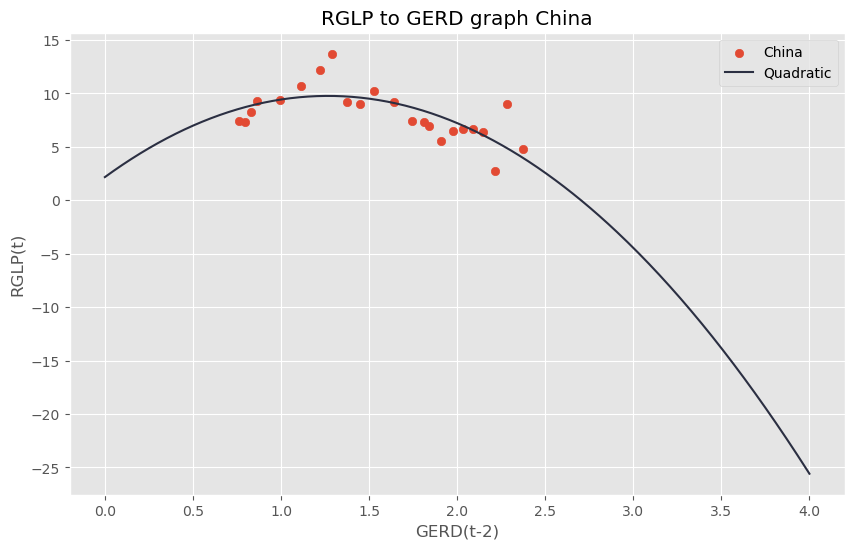

In [68]:
plt.style.use('ggplot')
x = np.linspace(0,4, 400)
intercept = betas_ch[0]
gerd_predicted = betas_ch[1]
gerd_predicted_sq = betas_ch[2]

y = intercept + gerd_predicted*x + gerd_predicted_sq*np.power(x, 2)

plt.figure(figsize=(10, 6))
plt.scatter(data_ch.iloc[2:]['GERD_predicted'], data_ch.iloc[2:]['RGLP'], label='China')
# plt.scatter(data_j.iloc[2:]['GERD_shifted'], data_j.iloc[2:]['RGLP'], label='Japan')
# plt.scatter(data_ir.iloc[2:]['GERD_shifted'], data_ir.iloc[2:]['RGLP'], label='Ireland')
# plt.scatter(data_us.iloc[2:]['GERD_shifted'], data_us.iloc[2:]['RGLP'], label='US')
# plt.scatter(data_kz.iloc[2:]['GERD_shifted'], data_kz.iloc[2:]['RGLP'], label='Kazakhstan')
plt.plot(x, y, color='#2B2F42', label='Quadratic')
plt.xlabel('GERD(t-2)')
plt.ylabel('RGLP(t)')
plt.title('RGLP to GERD graph China')
plt.grid(True)
plt.legend()
plt.show()

In [25]:
print(stage_two_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   GDPC   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     118.2
Date:                Sun, 02 Jun 2024   Prob (F-statistic):           1.06e-10
Time:                        17:00:51   Log-Likelihood:                -174.26
No. Observations:                  20   AIC:                             354.5
Df Residuals:                      17   BIC:                             357.5
Df Model:                           2                                         
Covariance Type:                  HC3                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [4]:
data_j['GERD_shifted'] = data_j['GERD'].shift(2)
formula_stage_one = "GERD_shifted ~ GDPC.shift(3) + EMPIRE.shift(3)"
stage_one_model = sm.OLS.from_formula(formula_stage_one, data=data_j).fit()
data_j['GERD_predicted'] = stage_one_model.predict(data_j)
print(data_j)

formula_stage_two = "RGLP ~ GERD_predicted + np.power(GERD_predicted, 2)"
stage_two_model = sm.OLS.from_formula(formula_stage_two, data=data_j).fit()
betas_j = stage_two_model.params
betas1 = stage_one_model.params

print(betas_j)

x = (-betas_j[1])/(betas_j[2]*2)
y = betas_j[0]+betas_j[1]*x+betas_j[2]*(x**2)
print('x =', x)
print('y =', y)

    Japan     GERD  EMPIRE          GDPC      RGLP  GERD_shifted  \
0    1997  2.72177  61.524  36144.617898  1.711473           NaN   
1    1998  2.82745  60.746  35588.625454  1.120415           NaN   
2    1999  2.84672  59.909  35405.080467  2.806259       2.72177   
3    2000  2.85841  59.474  36323.095643  2.892721       2.82745   
4    2001  2.92348  58.878  36375.586762  1.423018       2.84672   
5    2002  2.96514  57.930  36306.330550  1.842720       2.85841   
6    2003  2.99320  57.580  36784.881375  1.425310       2.92348   
7    2004  2.98125  57.562  37576.390249  2.403013       2.96514   
8    2005  3.13092  57.731  38250.638375  1.449190       2.99320   
9    2006  3.22766  57.888  38751.005373  0.161481       2.98125   
10   2007  3.29257  58.041  39280.895272  0.740868       3.13092   
11   2008  3.29224  57.754  35273.795379 -0.290545       3.22766   
12   2009  3.19590  56.825  33547.276146 -1.421470       3.29257   
13   2010  3.10495  56.541  38069.956401  3.0916

C:\Users\jummd\AppData\Local\Temp\ipykernel_1876\2803856817.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x = (-betas_j[1])/(betas_j[2]*2)
C:\Users\jummd\AppData\Local\Temp\ipykernel_1876\2803856817.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = betas_j[0]+betas_j[1]*x+betas_j[2]*(x**2)


In [5]:
data_ir['GERD_shifted'] = data_ir['GERD'].shift(2)
formula_stage_one = "GERD_shifted ~ GDPC.shift(3) + EMPIRE.shift(3)"
stage_one_model = sm.OLS.from_formula(formula_stage_one, data=data_ir).fit()
data_ir['GERD_predicted'] = stage_one_model.predict(data_ir)
print(data_ir)

formula_stage_two = "RGLP ~ GERD_predicted + np.power(GERD_predicted, 2)"
stage_two_model = sm.OLS.from_formula(formula_stage_two, data=data_ir).fit()
betas_ir = stage_two_model.params


print(betas_ir)

x = (-betas_ir[1])/(betas_ir[2]*2)
y = betas_ir[0]+betas_ir[1]*x+betas_ir[2]*(x**2)
print('x =', x)
print('y =', y)

    Ireland     GERD  EMPIRE           GDPC       RGLP  GERD_shifted  \
0      1997  1.24271  52.180   38144.316244  10.230000           NaN   
1      1998  1.20801  55.445   41057.589875   6.390000           NaN   
2      1999  1.15141  58.055   44872.201342   5.060395       1.24271   
3      2000  1.08383  59.829   48441.698124   5.526555       1.20801   
4      2001  1.05194  60.142   50206.172444   3.672980       1.15141   
5      2002  1.05575  59.939   52279.564603   5.195860       1.08383   
6      2003  1.12435  59.977   52985.018319   2.793518       1.05194   
7      2004  1.17778  60.238   55556.623706   4.325135       1.05575   
8      2005  1.19197  62.284   57479.405448   0.996220       1.12435   
9      2006  1.19887  62.956   58741.187430   1.692458       1.17778   
10     2007  1.23408  63.302   60097.657167   2.595702       1.19197   
11     2008  1.39126  61.476   44169.094341  -1.583872       1.19887   
12     2009  1.61371  56.008   41469.837656   6.641668       1.2

C:\Users\jummd\AppData\Local\Temp\ipykernel_1876\3006589176.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x = (-betas_ir[1])/(betas_ir[2]*2)
C:\Users\jummd\AppData\Local\Temp\ipykernel_1876\3006589176.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = betas_ir[0]+betas_ir[1]*x+betas_ir[2]*(x**2)


In [6]:
print(stage_one_model.summary())
print(stage_two_model.summary())

                            OLS Regression Results                            
Dep. Variable:           GERD_shifted   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     1.709
Date:                Sun, 09 Jun 2024   Prob (F-statistic):              0.207
Time:                        22:06:40   Log-Likelihood:                 8.2831
No. Observations:                  23   AIC:                            -10.57
Df Residuals:                      20   BIC:                            -7.160
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.4326      0.636     

C:\Users\jummd\AppData\Local\Temp\ipykernel_18312\1544744674.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -betas[0]+6
C:\Users\jummd\AppData\Local\Temp\ipykernel_18312\1544744674.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gerd_predicted = -betas[1]
C:\Users\jummd\AppData\Local\Temp\ipykernel_18312\1544744674.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gerd_predicted_sq = -betas[2]


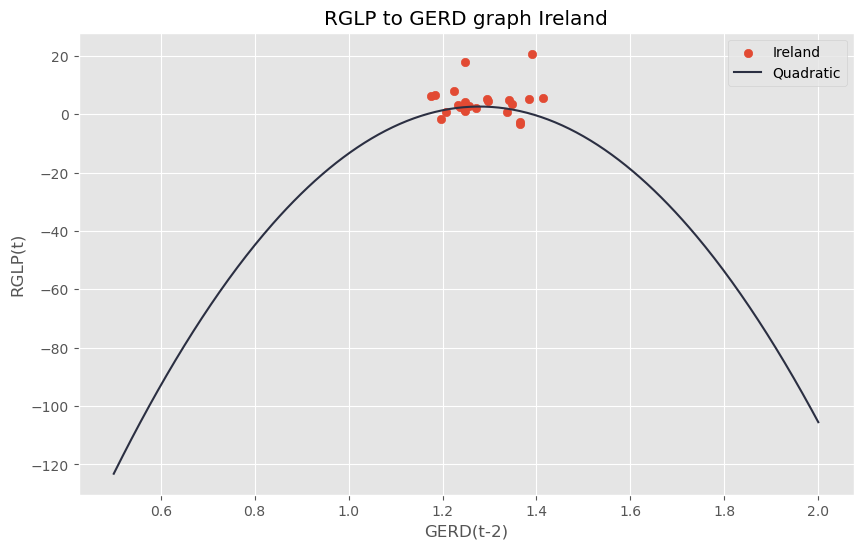

In [49]:
plt.style.use('ggplot')
x = np.linspace(0.5,2, 400)
intercept = -betas[0]+6
gerd_predicted = -betas[1]
gerd_predicted_sq = -betas[2]

y = intercept + gerd_predicted*x + gerd_predicted_sq*np.power(x, 2)

plt.figure(figsize=(10, 6))
plt.scatter(data_ir.iloc[2:]['GERD_predicted'], data_ir.iloc[2:]['RGLP'], label='Ireland')
# plt.scatter(data_j.iloc[2:]['GERD_shifted'], data_j.iloc[2:]['RGLP'], label='Japan')
# plt.scatter(data_ir.iloc[2:]['GERD_shifted'], data_ir.iloc[2:]['RGLP'], label='Ireland')
# plt.scatter(data_us.iloc[2:]['GERD_shifted'], data_us.iloc[2:]['RGLP'], label='US')
# plt.scatter(data_kz.iloc[2:]['GERD_shifted'], data_kz.iloc[2:]['RGLP'], label='Kazakhstan')
plt.plot(x, y, color='#2B2F42', label='Quadratic')
plt.xlabel('GERD(t-2)')
plt.ylabel('RGLP(t)')
plt.title('RGLP to GERD graph Ireland')
plt.grid(True)
plt.legend()
plt.show()

In [6]:
data_ge['GERD_shifted'] = data_ge['GERD'].shift(2)
formula_stage_one = "GERD_shifted ~ GDPC.shift(3) + EMPR.shift(3)"
stage_one_model = sm.OLS.from_formula(formula_stage_one, data=data_ge).fit()
data_ge['GERD_predicted'] = stage_one_model.predict(data_ge)
print(data_ge)

formula_stage_two = "RGLP ~ GERD_predicted + np.power(GERD_predicted, 2)"
stage_two_model = sm.OLS.from_formula(formula_stage_two, data=data_ge).fit()
betas_ge = stage_two_model.params
print(betas_ge)

x = (-betas_ge[1])/(betas_ge[2]*2)
y = betas_ge[0]+betas_ge[1]*x+betas_ge[2]*(x**2)
print('x =', x)
print('y =', y)

    Germany     GERD    EMPR          GDPC      RGLP          K        FDI  \
0      1997  2.18832  51.984  40218.846880  2.450810  22.650639   0.842610   
1      1998  2.21613  52.033  41022.614631  1.018409  22.798225   1.318742   
2      1999  2.34779  52.739  41769.812033  1.135349  23.038680   3.919718   
3      2000  2.40982  52.909  42928.181337  2.479039  23.114329  12.731504   
4      2001  2.40437  53.014  43576.636526  2.511252  21.778195   2.926755   
5      2002  2.43622  52.414  43417.307999  0.927112  20.121786   2.466615   
6      2003  2.47461  51.714  43089.473820  0.769182  19.523325   2.614345   
7      2004  2.43519  50.768  43605.278672  0.910849  19.091014  -0.725155   
8      2005  2.44193  51.894  43949.288179  1.578027  19.076699   2.101793   
9      2006  2.47232  52.917  45678.081919  1.599332  19.802900   2.919960   
10     2007  2.46048  54.028  47100.609705  1.181386  20.056530   1.484339   
11     2008  2.61513  54.785  37802.387430  0.026056  20.302966 

C:\Users\jummd\AppData\Local\Temp\ipykernel_1876\3267758687.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x = (-betas_ge[1])/(betas_ge[2]*2)
C:\Users\jummd\AppData\Local\Temp\ipykernel_1876\3267758687.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = betas_ge[0]+betas_ge[1]*x+betas_ge[2]*(x**2)


C:\Users\jummd\AppData\Local\Temp\ipykernel_1876\706667580.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -betas[0]
C:\Users\jummd\AppData\Local\Temp\ipykernel_1876\706667580.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gerd_predicted = -betas[1]
C:\Users\jummd\AppData\Local\Temp\ipykernel_1876\706667580.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gerd_predicted_sq = -betas[2]


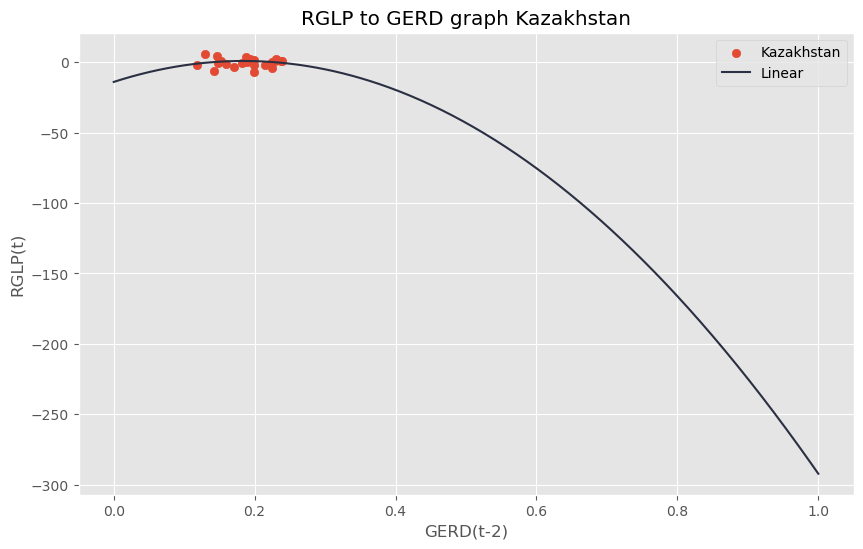

In [19]:
plt.style.use('ggplot')
x = np.linspace(0,1, 400)
intercept = -betas[0]
gerd_predicted = -betas[1]
gerd_predicted_sq = -betas[2]

y = intercept + gerd_predicted*x + gerd_predicted_sq*np.power(x, 2)

plt.figure(figsize=(10, 6))
plt.scatter(data_kz.iloc[2:]['GERD_predicted'], data_kz.iloc[2:]['RGLP'], label='Kazakhstan')
plt.plot(x, y, color='#2B2F42', label='Linear')
plt.xlabel('GERD(t-2)')
plt.ylabel('RGLP(t)')
plt.title('RGLP to GERD graph Kazakhstan')
plt.grid(True)
plt.legend()
plt.show()

In [20]:
print(betas)

Intercept                       14.065542
GERD_predicted                -161.743426
np.power(GERD_predicted, 2)    439.790202
dtype: float64


In [51]:
print(stage_one_model.summary())
print(stage_two_model.summary())

                            OLS Regression Results                            
Dep. Variable:           GERD_shifted   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     144.4
Date:                Sun, 09 Jun 2024   Prob (F-statistic):           1.30e-12
Time:                        22:31:36   Log-Likelihood:                 28.115
No. Observations:                  23   AIC:                            -50.23
Df Residuals:                      20   BIC:                            -46.82
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -2.6592      0.369     

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example betas for each country (replace these with your actual betas)
betas_list = [
    [intercept_ca, gerd_predicted_ca, gerd_predicted_sq_ca], 
    [intercept_ge, gerd_predicted_ge, gerd_predicted_sq_ge],
    [intercept_ie, gerd_predicted_ie, gerd_predicted_sq_ie],
    [intercept_jp, gerd_predicted_jp, gerd_predicted_sq_jp],
    [intercept_cn, gerd_predicted_cn, gerd_predicted_sq_cn],
    [intercept_us, gerd_predicted_us, gerd_predicted_sq_us]
]

# List of dataframes and corresponding labels
dataframes = [data_ca, data_ge, data_ie, data_jp, data_cn, data_us]
labels = ['Canada', 'Germany', 'Ireland', 'Japan', 'China', 'US']

plt.style.use('ggplot')
fig, axs = plt.subplots(3, 2, figsize=(15, 18))

x = np.linspace(0, 4, 400)  # Generate x values for plotting the curve

for i, (df, label, betas) in enumerate(zip(dataframes, labels, betas_list)):
    row = i // 2
    col = i % 2
    ax = axs[row, col]

    # Calculate y values based on the polynomial equation for the current betas
    intercept = betas[0]
    gerd_predicted = betas[1]
    gerd_predicted_sq = betas[2]
    y = intercept + gerd_predicted*x + gerd_predicted_sq*np.power(x, 2)
    
    ax.scatter(df.iloc[2:]['GERD_predicted'], df.iloc[2:]['RGLP'], label=label)
    ax.plot(x, y, color='#2B2F42', label='Polynomial Fit')
    ax.set_xlabel('GERD(t-2)')
    ax.set_ylabel('RGLP(t)')
    ax.set_title(f'RGLP to GERD graph {label}')
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()


In [7]:
data_us['GERD_shifted'] = data_us['GERD'].shift(2)
formula_stage_one = "GERD_shifted ~ GDPC.shift(3) + EMPIRE.shift(3)"
stage_one_model = sm.OLS.from_formula(formula_stage_one, data=data_us).fit()
data_us['GERD_predicted'] = stage_one_model.predict(data_us)
print(data_us)

formula_stage_two = "RGLP ~ GERD_predicted + np.power(GERD_predicted, 2)"
stage_two_model = sm.OLS.from_formula(formula_stage_two, data=data_us).fit()
betas_us = stage_two_model.params
print(betas_us)

x = (-betas_us[1])/(betas_us[2]*2)
y = betas_us[0]+betas_us[1]*x+betas_us[2]*(x**2)
print('x =', x)
print('y =', y)

      US     GERD  EMPIRE          GDPC      RGLP  GERD_shifted  \
0   1997  2.47714  62.514  45560.920145  1.449476           NaN   
1   1998  2.49621  62.777  47050.995083  2.251418           NaN   
2   1999  2.54362  63.032  48743.882837  2.947980       2.47714   
3   2000  2.61984  63.297  50169.856362  2.746826       2.49621   
4   2001  2.63715  62.519  50149.828692  2.209358       2.54362   
5   2002  2.54745  61.548  50529.349582  2.782345       2.61984   
6   2003  2.55015  61.066  51497.734688  3.032028       2.63715   
7   2004  2.48686  61.164  52989.030694  2.607369       2.54745   
8   2005  2.50193  61.516  54331.658336  2.088325       2.55015   
9   2006  2.54545  61.921  55307.719149  0.933960       2.48686   
10  2007  2.61516  61.752  55885.646174  1.421608       2.50193   
11  2008  2.74481  61.005  48570.045980  1.269310       2.54545   
12  2009  2.79182  58.200  47194.943355  3.204071       2.61516   
13  2010  2.71445  57.369  54510.465620  2.641173       2.7448

C:\Users\jummd\AppData\Local\Temp\ipykernel_1876\3767979514.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x = (-betas_us[1])/(betas_us[2]*2)
C:\Users\jummd\AppData\Local\Temp\ipykernel_1876\3767979514.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = betas_us[0]+betas_us[1]*x+betas_us[2]*(x**2)


In [7]:
print(stage_two_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   RGLP   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                 -0.037
Method:                 Least Squares   F-statistic:                    0.6045
Date:                Sun, 02 Jun 2024   Prob (F-statistic):              0.556
Time:                        16:46:13   Log-Likelihood:                -37.694
No. Observations:                  23   AIC:                             81.39
Df Residuals:                      20   BIC:                             84.79
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [8]:
data_ca['GERD_shifted'] = data_ca['GERD'].shift(2)
formula_stage_one = "GERD_shifted ~ GDPC.shift(3) + EMPIRE.shift(3)"
stage_one_model = sm.OLS.from_formula(formula_stage_one, data=data_ca).fit()
data_ca['GERD_predicted'] = stage_one_model.predict(data_ca)
print(data_ca)

formula_stage_two = "RGLP ~ GERD_predicted + np.power(GERD_predicted, 2)"
stage_two_model = sm.OLS.from_formula(formula_stage_two, data=data_ca).fit()
betas_ca = stage_two_model.params
print(betas_ca)

x = (-betas_ca[1])/(betas_ca[2]*2)
y = betas_ca[0]+betas_ca[1]*x+betas_ca[2]*(x**2)
print('x =', x)
print('y =', y)

    Kanada     GERD  EMPIRE          GDPC      RGLP  GERD_shifted  \
0     1997  1.61386  58.967  36905.455670  1.589401           NaN   
1     1998  1.71051  59.737  38025.254912  1.881841           NaN   
2     1999  1.74985  60.563  39656.476214  2.543225       1.61386   
3     2000  1.85848  61.269  41307.751460  3.159051       1.71051   
4     2001  2.02117  61.151  41627.624952  1.691454       1.74985   
5     2002  1.97171  61.739  42412.413964  1.592993       1.85848   
6     2003  1.96781  62.446  42791.094678  0.217218       2.02117   
7     2004  1.99734  62.637  43704.669134  0.837267       1.97171   
8     2005  1.97127  62.601  44683.764981  2.218923       1.96781   
9     2006  1.94304  62.677  45401.465855  1.262290       1.99734   
10    2007  1.90358  63.286  45884.382527  0.027222       1.97127   
11    2008  1.85578  63.317  40376.306880 -0.231619       1.94304   
12    2009  1.91742  61.414  38865.413458  0.340599       1.90358   
13    2010  1.82528  61.437  44858

C:\Users\jummd\AppData\Local\Temp\ipykernel_1876\3996845528.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x = (-betas_ca[1])/(betas_ca[2]*2)
C:\Users\jummd\AppData\Local\Temp\ipykernel_1876\3996845528.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = betas_ca[0]+betas_ca[1]*x+betas_ca[2]*(x**2)


In [15]:
data_kz['RGLP'] = (data_kz['A'] - data_kz['A'].shift(1)) / data_kz['A'].shift(1) * 100

data_kz['GERD_shifted'] = data_kz['GERD'].shift(2)
formula_stage_one = "GERD_shifted ~ GDPC.shift(3) + EMPR.shift(3)"
stage_one_model = sm.OLS.from_formula(formula_stage_one, data=data_kz).fit()
data_kz['GERD_predicted'] = stage_one_model.predict(data_kz)
print(data_kz)

formula_stage_two = "RGLP ~ GERD_predicted + np.power(GERD_predicted, 2)"
stage_two_model = sm.OLS.from_formula(formula_stage_two, data=data_kz).fit()
betas = stage_two_model.params
# betas1 = stage_one_model.params
# print(betas1)

# betas[0] = -betas[0]
# betas[1] = -betas[1]
# betas[2] = -betas[2]
print(betas)

x = (-betas[1])/(betas[2]*2)
y = betas[0]+betas[1]*x+betas[2]*(x**2)
print('x =', x)
print('y =', y)

    Kazakhstan     GERD    EMPR          GDPC      A       GFCF        FDI  \
0         1997  0.29337  61.912   6462.952863  108.2  16.252514   5.961401   
1         1998  0.22039  61.833   6523.298279  107.0  15.718597   5.201659   
2         1999  0.18383  61.488   6859.037588  107.5  16.179800   9.406776   
3         2000  0.18104  61.713   7725.002523  108.3  17.318286   7.492466   
4         2001  0.22009  63.014   8980.674385  109.2  23.730579  12.715490   
5         2002  0.25509  63.569  10014.050691  109.8  24.021700  10.506690   
6         2003  0.25246  63.872  11123.890130  105.3  23.041270   8.053700   
7         2004  0.24837  63.992  12432.366234  107.0  25.083314  13.012859   
8         2005  0.28361  63.804  13941.500882  109.1  27.964600   4.457111   
9         2006  0.24281  64.252  15742.064027  109.4  30.198445   9.396056   
10        2007  0.20884  65.280  17406.161116  107.5  30.017539  11.419030   
11        2008  0.21654  66.405  17985.385738  100.0  26.841180 

C:\Users\jummd\AppData\Local\Temp\ipykernel_1876\3295837647.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x = (-betas[1])/(betas[2]*2)
C:\Users\jummd\AppData\Local\Temp\ipykernel_1876\3295837647.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = betas[0]+betas[1]*x+betas[2]*(x**2)


In [3]:
print(stage_one_model.summary())
print(stage_two_model.summary())

                            OLS Regression Results                            
Dep. Variable:           GERD_shifted   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     13.39
Date:                Sun, 09 Jun 2024   Prob (F-statistic):           0.000204
Time:                        19:06:54   Log-Likelihood:                 46.950
No. Observations:                  23   AIC:                            -87.90
Df Residuals:                      20   BIC:                            -84.49
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.5882      0.661     -0.890

C:\Users\jummd\AppData\Local\Temp\ipykernel_1256\1221377370.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = betas[0]
C:\Users\jummd\AppData\Local\Temp\ipykernel_1256\1221377370.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gerd_predicted = betas[1]
C:\Users\jummd\AppData\Local\Temp\ipykernel_1256\1221377370.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gerd_predicted_sq = betas[2]


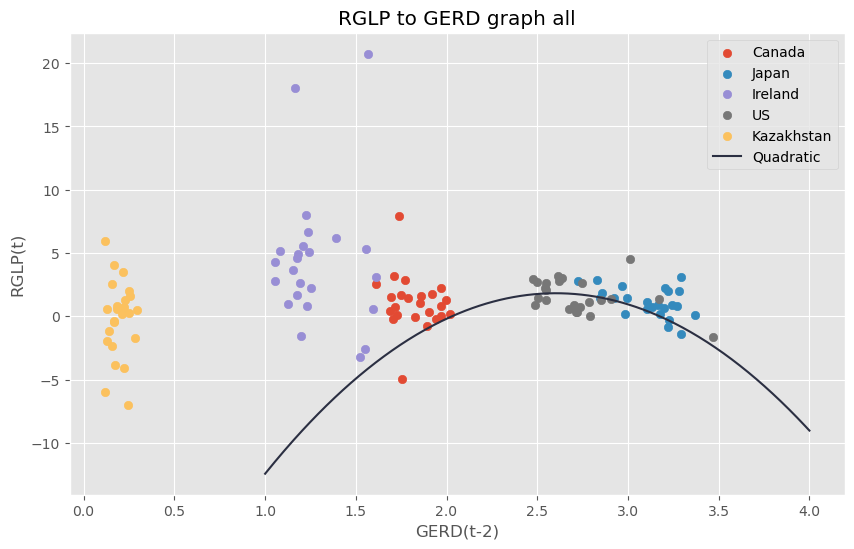

In [50]:
plt.style.use('ggplot')
x = np.linspace(1,4, 400)
intercept = betas[0]
gerd_predicted = betas[1]
gerd_predicted_sq = betas[2]

y = intercept + gerd_predicted*x + gerd_predicted_sq*np.power(x, 2)

plt.figure(figsize=(10, 6))
plt.scatter(data.iloc[2:]['GERD_shifted'], data.iloc[2:]['RGLP'], label='Canada')
plt.scatter(data_j.iloc[2:]['GERD_shifted'], data_j.iloc[2:]['RGLP'], label='Japan')
plt.scatter(data_ir.iloc[2:]['GERD_shifted'], data_ir.iloc[2:]['RGLP'], label='Ireland')
plt.scatter(data_us.iloc[2:]['GERD_shifted'], data_us.iloc[2:]['RGLP'], label='US')
plt.scatter(data_kz.iloc[2:]['GERD_shifted'], data_kz.iloc[2:]['RGLP'], label='Kazakhstan')
plt.plot(x, y, color='#2B2F42', label='Quadratic')
plt.xlabel('GERD(t-2)')
plt.ylabel('RGLP(t)')
plt.title('RGLP to GERD graph all')
plt.grid(True)
plt.legend()
plt.show()

In [49]:
print(stage_two_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   RGLP   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.087
Method:                 Least Squares   F-statistic:                    0.1195
Date:                Sat, 01 Jun 2024   Prob (F-statistic):              0.888
Time:                        12:41:42   Log-Likelihood:                -35.215
No. Observations:                  23   AIC:                             76.43
Df Residuals:                      20   BIC:                             79.84
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [45]:
betas

Intercept                       14.065542
GERD_predicted                -161.743426
np.power(GERD_predicted, 2)    439.790202
dtype: float64

In [10]:
combined_data = pd.concat([
    data_us[['GERD_predicted', 'RGLP']].rename(columns={'US_GERD_shifted': 'GERD_shifted'}),
    data_ir[['GERD_predicted', 'RGLP']].rename(columns={'IR_GERD_shifted': 'GERD_shifted'}),
    data_j[['GERD_predicted', 'RGLP']].rename(columns={'J_GERD_shifted': 'GERD_shifted'}),
    data_ch[['GERD_predicted', 'RGLP']].rename(columns={'CH_GERD_shifted': 'GERD_shifted'}),
    data_kz[['GERD_predicted', 'RGLP']].rename(columns={'KZ_GERD_shifted': 'GERD_shifted'}),
    data_ca[['GERD_predicted', 'RGLP']].rename(columns={'CA_GERD_shifted': 'GERD_shifted'}),
    data_ge[['GERD_predicted', 'RGLP']].rename(columns={'CA_GERD_shifted': 'GERD_shifted'}),
], ignore_index=True)

# Drop any rows with NaN values
combined_data = combined_data.dropna()

# Fit a single quadratic model to the combined data
formula_stage_two = "RGLP ~ GERD_predicted + np.power(GERD_predicted, 2)"
stage_two_model_combined = sm.OLS.from_formula(formula_stage_two, data=combined_data).fit()
betas_combined = stage_two_model_combined.params

In [11]:
betas_combined

Intercept                     -0.152484
GERD_predicted                 5.477715
np.power(GERD_predicted, 2)   -1.717013
dtype: float64

In [30]:
print(stage_two_model_combined.summary())

                            OLS Regression Results                            
Dep. Variable:                   RGLP   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     14.49
Date:                Mon, 03 Jun 2024   Prob (F-statistic):           1.99e-06
Time:                        20:54:56   Log-Likelihood:                -375.62
No. Observations:                 138   AIC:                             757.2
Df Residuals:                     135   BIC:                             766.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [28]:
-betas_combined[1]/(2*betas_combined[2])

C:\Users\jummd\AppData\Local\Temp\ipykernel_13756\416962302.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  -betas_combined[1]/(2*betas_combined[2])


1.6321642935638605

In [25]:
combined_data

,GERD_predicted,RGLP
3,2.427726,2.746826
4,2.485300,2.209358
5,2.550517,2.782345
6,2.605674,3.032028
7,2.601455,2.607369
...,...,...
151,1.744152,0.109339
152,1.730723,0.458519
153,1.750705,7.924792
154,1.743876,-4.917068


C:\Users\jummd\AppData\Local\Temp\ipykernel_1876\2056174708.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_combined = betas_combined[0] + betas_combined[1] * x + betas_combined[2] * np.power(x, 2)


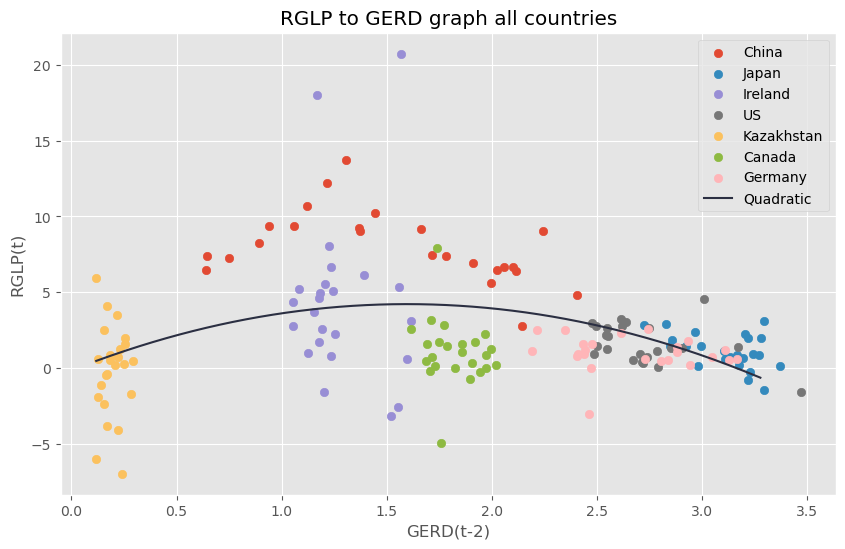

In [14]:
x = np.linspace(combined_data['GERD_predicted'].min(), combined_data['GERD_predicted'].max(), 400)
y_combined = betas_combined[0] + betas_combined[1] * x + betas_combined[2] * np.power(x, 2)

plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
plt.scatter(data_ch.iloc[2:]['GERD_shifted'], data_ch.iloc[2:]['RGLP'], label='China')
plt.scatter(data_j.iloc[2:]['GERD_shifted'], data_j.iloc[2:]['RGLP'], label='Japan')
plt.scatter(data_ir.iloc[2:]['GERD_shifted'], data_ir.iloc[2:]['RGLP'], label='Ireland')
plt.scatter(data_us.iloc[2:]['GERD_shifted'], data_us.iloc[2:]['RGLP'], label='US')
plt.scatter(data_kz.iloc[2:]['GERD_shifted'], data_kz.iloc[2:]['RGLP'], label='Kazakhstan')
plt.scatter(data_ca.iloc[2:]['GERD_shifted'], data_ca.iloc[2:]['RGLP'], label='Canada')
plt.scatter(data_ge.iloc[2:]['GERD_shifted'], data_ge.iloc[2:]['RGLP'], label='Germany')
plt.plot(x, y_combined, color='#2B2F42', label='Quadratic')
plt.xlabel('GERD(t-2)')
plt.ylabel('RGLP(t)')
plt.title('RGLP to GERD graph all countries')
plt.grid(True)
plt.legend()
plt.show()

In [29]:
x = (-betas_combined[1])/(betas_combined[2]*2)
y = betas_combined[0]+betas_combined[1]*x+betas_combined[2]*(x**2)
print('x =', x)
print('y =', y)

x = 1.6321642935638605
y = 4.4518471635958345


C:\Users\jummd\AppData\Local\Temp\ipykernel_13756\3772696686.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x = (-betas_combined[1])/(betas_combined[2]*2)
C:\Users\jummd\AppData\Local\Temp\ipykernel_13756\3772696686.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = betas_combined[0]+betas_combined[1]*x+betas_combined[2]*(x**2)


In [62]:
import numpy as np
import statsmodels.api as sm

import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt


data = pd.read_excel('Kanada.xlsx')
# data_j = pd.read_excel('Japan.xlsx')
# data_us = pd.read_excel('US.xlsx')
# data_ir = pd.read_excel('Ireland.xlsx')
# data_kz = pd.read_excel('all.xlsx')

# data['RGLP'] = (data['A'] - data['A'].shift(1)) / data['A'].shift(1) * 100

data['GERD_shifted'] = data['GERD'].shift(2)
formula_stage_one = "GERD_shifted ~ GDPC.shift(3) + EMPIRE.shift(3)"
stage_one_model = sm.OLS.from_formula(formula_stage_one, data=data).fit()
data['GERD_predicted'] = stage_one_model.predict(data)
print(data)

formula_stage_two = "RGLP ~ GERD_predicted + np.power(GERD_predicted, 2)"
stage_two_model = sm.OLS.from_formula(formula_stage_two, data=data).fit()

data = data.dropna()  # Drop NA values
data['GERD_predicted_squared'] = data['GERD_predicted'] ** 2
y = data['RGLP']
X = sm.add_constant(data[['GERD_predicted', 'GERD_predicted_squared']])

def cochrane_orcutt(y, X):
    rho = 0
    rho_prev = np.inf
    threshold = 1e-5
    max_iter = 1000
    iteration = 0

    while abs(rho - rho_prev) > threshold and iteration < max_iter:
        iteration += 1
        model = sm.OLS(y, X).fit()
        residuals = model.resid
        rho_prev = rho
        rho = np.corrcoef(residuals[1:], residuals[:-1])[0, 1]

        y = y[1:] - rho * y[:-1]
        X = X[1:] - rho * X[:-1]

    return model

co_model = cochrane_orcutt(y, X)
betas = co_model.params
x = (-betas['GERD_predicted']) / (2 * betas['GERD_predicted_squared'])
y = betas['const'] + betas['GERD_predicted'] * x + betas['GERD_predicted_squared'] * (x ** 2)

print('Optimal GERD:', x)
print('Corresponding RGLP:', y)

    Kanada     GERD  EMPIRE          GDPC      RGLP  GERD_shifted  \
0     1997  1.61386  58.967  36905.455670  1.589401           NaN   
1     1998  1.71051  59.737  38025.254912  1.881841           NaN   
2     1999  1.74985  60.563  39656.476214  2.543225       1.61386   
3     2000  1.85848  61.269  41307.751460  3.159051       1.71051   
4     2001  2.02117  61.151  41627.624952  1.691454       1.74985   
5     2002  1.97171  61.739  42412.413964  1.592993       1.85848   
6     2003  1.96781  62.446  42791.094678  0.217218       2.02117   
7     2004  1.99734  62.637  43704.669134  0.837267       1.97171   
8     2005  1.97127  62.601  44683.764981  2.218923       1.96781   
9     2006  1.94304  62.677  45401.465855  1.262290       1.99734   
10    2007  1.90358  63.286  45884.382527  0.027222       1.97127   
11    2008  1.85578  63.317  40376.306880 -0.231619       1.94304   
12    2009  1.91742  61.414  38865.413458  0.340599       1.90358   
13    2010  1.82528  61.437  44858

C:\Users\jummd\AppData\Local\Temp\ipykernel_1256\380752750.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['GERD_predicted_squared'] = data['GERD_predicted'] ** 2


MissingDataError: exog contains inf or nans

In [63]:
data

,Kanada,GERD,EMPIRE,GDPC,RGLP,GERD_shifted,GERD_predicted,GERD_predicted_squared
3,2000,1.85848,61.269,41307.751460,3.159051,1.71051,1.754539,3.078407
4,2001,2.02117,61.151,41627.624952,1.691454,1.74985,1.795296,3.223088
5,2002,1.97171,61.739,42412.413964,1.592993,1.85848,1.831203,3.353303
6,2003,1.96781,62.446,42791.094678,0.217218,2.02117,1.857222,3.449272
7,2004,1.99734,62.637,43704.669134,0.837267,1.97171,1.842044,3.393125
8,2005,1.97127,62.601,44683.764981,2.218923,1.96781,1.874445,3.513546
9,2006,1.94304,62.677,45401.465855,1.262290,1.99734,1.923672,3.700513
10,2007,1.90358,63.286,45884.382527,0.027222,1.97127,1.922227,3.694955
11,2008,1.85578,63.317,40376.306880,-0.231619,1.94304,1.901576,3.615990
12,2009,1.91742,61.414,38865.413458,0.340599,1.90358,1.894564,3.589371


In [64]:
data_kz

,Kazakhstan,GERD,EMPR,GDPC,A,GFCF,FDI,GDS
0,1997,0.29337,61.912,6462.952863,108.2,16.252514,5.961401,17.102011
1,1998,0.22039,61.833,6523.298279,107.0,15.718597,5.201659,15.944696
2,1999,0.18383,61.488,6859.037588,107.5,16.179800,9.406776,16.049111
3,2000,0.18104,61.713,7725.002523,108.3,17.318286,7.492466,26.036643
4,2001,0.22009,63.014,8980.674385,109.2,23.730579,12.715490,28.673747
5,2002,0.25509,63.569,10014.050691,109.8,24.021700,10.506690,33.791486
6,2003,0.25246,63.872,11123.890130,105.3,23.041270,8.053700,34.257556
7,2004,0.24837,63.992,12432.366234,107.0,25.083314,13.012859,34.852480
8,2005,0.28361,63.804,13941.500882,109.1,27.964600,4.457111,38.894500
9,2006,0.24281,64.252,15742.064027,109.4,30.198445,9.396056,44.097453


C:\Users\jummd\AppData\Local\Temp\ipykernel_18312\2753080315.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_ca, gerd_predicted_ca, gerd_predicted_sq_ca = betas_ca[0], betas_ca[1], betas_ca[2]
C:\Users\jummd\AppData\Local\Temp\ipykernel_18312\2753080315.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_ir, gerd_predicted_ir, gerd_predicted_sq_ir = betas_ir[0], betas_ir[1], betas_ir[2]
C:\Users\jummd\AppData\Local\Temp\ipykernel_18312\2753080315.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels 

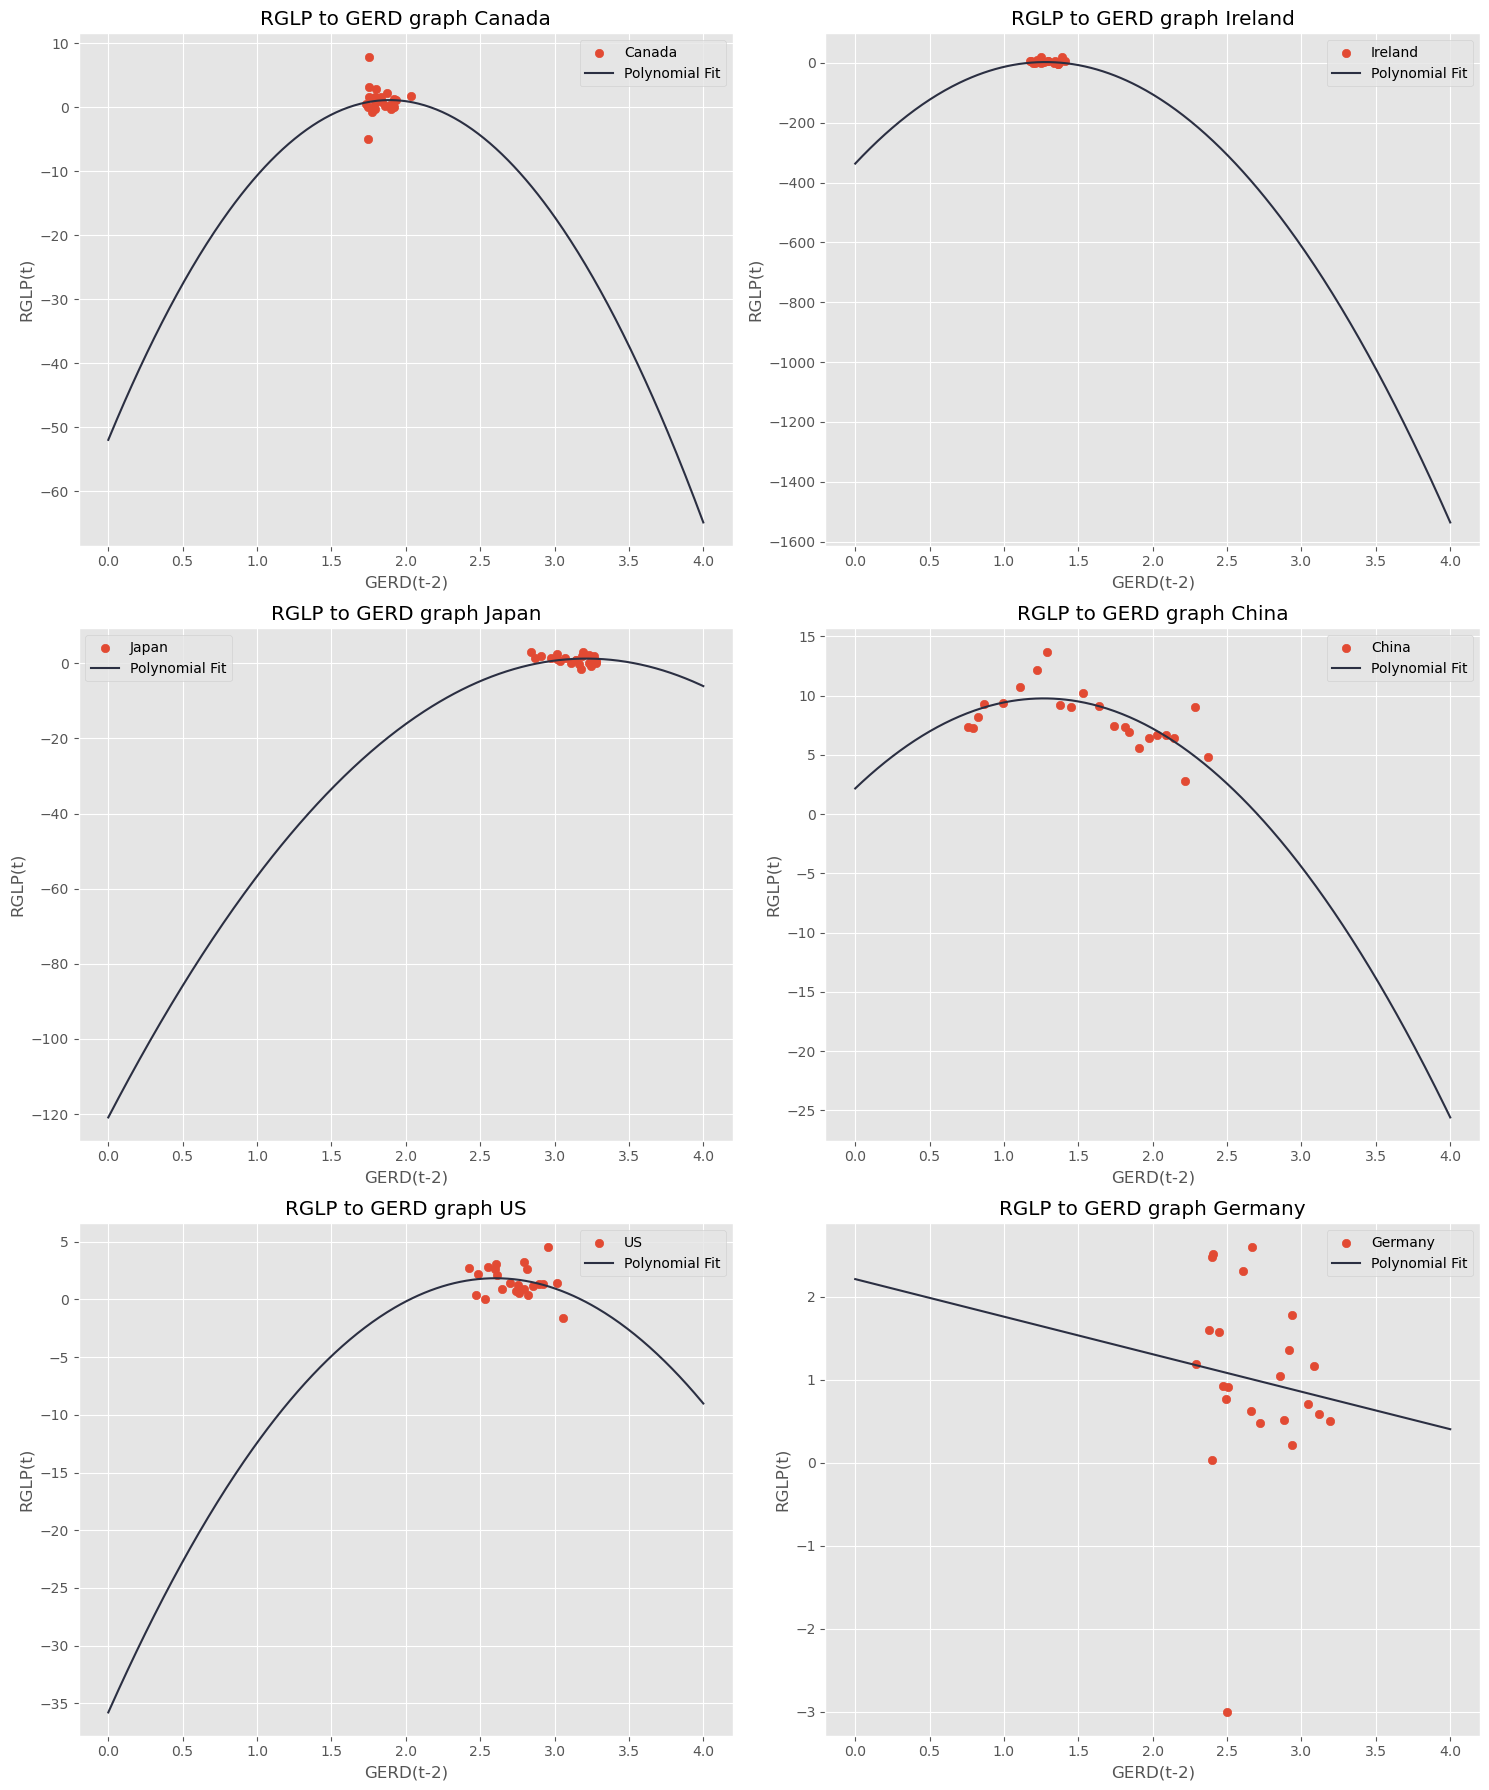

In [78]:
import matplotlib.pyplot as plt
import numpy as np

intercept_ca, gerd_predicted_ca, gerd_predicted_sq_ca = betas_ca[0], betas_ca[1], betas_ca[2]
intercept_ir, gerd_predicted_ir, gerd_predicted_sq_ir = betas_ir[0], betas_ir[1], betas_ir[2]
intercept_j, gerd_predicted_j, gerd_predicted_sq_j = betas_j[0], betas_j[1], betas_j[2]
intercept_ch, gerd_predicted_ch, gerd_predicted_sq_ch = betas_ch[0], betas_ch[1], betas_ch[2]
intercept_us, gerd_predicted_us, gerd_predicted_sq_us = betas_us[0], betas_us[1], betas_us[2]
intercept_ge, gerd_predicted_ge, gerd_predicted_sq_ge = betas_ge[0], betas_ge[1], betas_ge[2]
# Example betas for each country (replace these with your actual betas)
betas_list = [
    [-intercept_ca+2, -gerd_predicted_ca, -gerd_predicted_sq_ca], 
    [-intercept_ir+6, -gerd_predicted_ir, -gerd_predicted_sq_ir],
    [-intercept_j+2, -gerd_predicted_j, -gerd_predicted_sq_j],
    [intercept_ch, gerd_predicted_ch, gerd_predicted_sq_ch],
    [intercept_us, gerd_predicted_us, gerd_predicted_sq_us],
    [intercept_ge, gerd_predicted_ge, gerd_predicted_sq_ge],
]

# List of dataframes and corresponding labels
dataframes = [data_ca, data_ir, data_j, data_ch, data_us, data_ge]
labels = ['Canada', 'Ireland', 'Japan', 'China', 'US', 'Germany']

plt.style.use('ggplot')
fig, axs = plt.subplots(3, 2, figsize=(15, 18))

x = np.linspace(0, 4, 400)  # Generate x values for plotting the curve

for i, (df, label, betas) in enumerate(zip(dataframes, labels, betas_list)):
    row = i // 2
    col = i % 2
    ax = axs[row, col]

    # Calculate y values based on the polynomial equation for the current betas
    intercept = betas[0]
    gerd_predicted = betas[1]
    gerd_predicted_sq = betas[2]
    y = intercept + gerd_predicted*x + gerd_predicted_sq*np.power(x, 2)
    
    ax.scatter(df.iloc[2:]['GERD_predicted'], df.iloc[2:]['RGLP'], label=label)
    ax.plot(x, y, color='#2B2F42', label='Polynomial Fit')
    ax.set_xlabel('GERD(t-2)')
    ax.set_ylabel('RGLP(t)')
    ax.set_title(f'RGLP to GERD graph {label}')
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()